## Introdution
In 2017 around 24,831 injuries in road reported to police in UK. However, 
because of changes in system for reporting by police comparison of this figure should be interpreted with caution.
This report provides the traffic accidents in Great Britain that were reported by
the police in 2017. It includes number of accident severity and serious accidents in GB. 
The data and information used for statistics and collected by police force in different area in UK. 
These files provide detailed data about the circumstances of injury road accidents in Great Britain, 
the types of vehicles involved and the consequential casualties. The statistics relate only to personal injury 
accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident 
reporting form. Information on damage-only accidents.
Now a day, because massive amount of data using traditional way for data analysis is not enough. Big data can be a way to solve this problem by requiring high volume, velocity, value, veracity and have a new high-performance processing of data analysis.
Addressing big data is one of time-consuming task and it needs a large computational infrastructure to ensure successful data processing and analysis. Big data by using distributed storage, parallel processing and ability to process every type of data can pass through the challenges of data analysis. Big data analysis more focused on developments on different big data framework, such as Hadoop, Spark and some families of data pre-processing methods and applications on new big data learning paradigms.

Frist make directry file csv files and put them in that directory to use for uploading data. 

In [1]:
! hdfs dfs -mkdir Assignment-test

Put there data set in the directory Assignmrnt-test in hdfs to useing data after creating the tables and uploud data to the tables.

In [ ]:
!hdfs dfs -put Veh.csv /user/training/Assignment-test/
!hdfs dfs -put Acc.csv /user/training/Assignment-test/
!hdfs dfs -put Cas.csv /user/training/Assignment-test/

Then start with seeing insaide Assignment_files in Desktop directory. 

In [1]:
!ls

Acc.csv
Brief-guide-to road-accidents-and-safety-data.doc
Cas.csv
db_bdtt_ac
readme.txt
Road-Accident-Safety-Data-Guide.xls
roadgb.ipynb
Veh.csv


Check the directory.

In [56]:
!pwd

/home/training/Desktop/Assignment_files


Read the text file inside Assignment_files folder to find that how to start, thanks!

In [4]:
!cat readme.txt








	(Accidents2017, Casualties2017, Vehicles2017)

Connect to the hive

In [5]:
! sudo service hive-server2 restart;

Stopped Hive Server2:[  OK  ]
Started Hive Server2 (hive-server2):[  OK  ]


Create database for putting the accidents, casualties and vehicles tables inside that in mysql.

In [60]:
!mysql -utraining -ptraining -e 'create database RoadGB;'

Check the databases RoadGB in mysql.

In [80]:
!mysql -utraining -ptraining -e 'show databases;'

+--------------------+
| Database           |
+--------------------+
| information_schema |
| RoadGB             |
| hue                |
| loudacre           |
| metastore          |
| mysql              |
| test               |
+--------------------+


First use MYSQL and create new database (RoadGB) for accidents and casualties dataset, 
because they already in MYSQL dump file, so use this command; 

In [6]:
!mysql -utraining -ptraining RoadGB < db_bdtt_ac;

check the tables accidents and casualties in RadGB database.

In [7]:
!mysql -utraining -ptraining -e 'use RoadGB; show tables;'

+------------------+
| Tables_in_RoadGB |
+------------------+
| accidents        |
| casualties       |
| vehicles         |
+------------------+


Create vehicles table in mysql

In [65]:
!mysql -utraining -ptraining -e 'use RoadGB; create table vehicles(Accident_Index varchar(50), Vehicle_Reference int, Vehicle_Type int, Towing_and_Articulation int, Vehicle_Manoeuvre int, Vehicle_Location_Restricted_Lane int, Junction_Location int, Skidding_and_Overturning int, Hit_Object_in_Carriageway int, Vehicle_Leaving_Carriageway int, Hit_Object_off_Carriageway int, 1st_Point_of_Impact int, Was_Vehicle_Left_Hand_Drive int, Journey_Purpose_of_Driver int, Sex_of_Driver int, Age_of_Driver int, Age_Band_of_Driver int, Engine_Capacity_CC int, Propulsion_Code int, Age_of_Vehicle int, Driver_IMD_Decile int, Driver_Home_Area_Type int, Vehicle_IMD_Decile int);'

Check vehicle table in RoadGB database

In [8]:
!mysql -utraining -ptraining -e 'use RoadGB; show tables;'

+------------------+
| Tables_in_RoadGB |
+------------------+
| accidents        |
| casualties       |
| vehicles         |
+------------------+


List the tables in the RoadGB database:

In [9]:
!sqoop list-tables --connect jdbc:mysql://localhost/RoadGB --username training --password training

19/05/04 16:03:55 INFO sqoop.Sqoop: Running Sqoop version: 1.4.5-cdh5.4.3
19/05/04 16:03:55 WARN tool.BaseSqoopTool: Setting your password on the command-line is insecure. Consider using -P instead.
19/05/04 16:03:56 INFO manager.MySQLManager: Preparing to use a MySQL streaming resultset.
accidents
casualties
vehicles


##Loading Data
For loading data, I build my own application in a Jupyter notebook. I already installed everything that I need and use PySpark to work in Databricks. Also I loaded data to Hadoop framework or HDFS that designed for storing data. HDFS has data node (stores actual data that reading, writing and processing) and name node (manage data nodes as a master). HDFS provides distributed storage and data security. 

##Import data 
I import and load data to virtual machine, for this project a MYSQL dump format and csv files, and use MYSQL server to load data also I use Sqoop to get data into Hadoop. As it clears both datasets accidents and casualties already in MYSQL dump file and I load vehicles table from csv file using Sqoop

### Import Accidents table from MYSQL to HDFS
Then, Import the accidents and causalities tables form MySQL into HDFS with Sqoop. I open a new terminal window and then List the tables in the loudacre database. So I used following command for Import accident table from MYSQL to HDFS: 

In [34]:
#import accidents table from mysql to hdfs
!sqoop import --connect jdbc:mysql://localhost/RoadGB --username training --password training --table accidents --target-dir /RoadGB/accidents -m 1

19/05/05 04:29:51 INFO sqoop.Sqoop: Running Sqoop version: 1.4.5-cdh5.4.3
19/05/05 04:29:51 WARN tool.BaseSqoopTool: Setting your password on the command-line is insecure. Consider using -P instead.
19/05/05 04:29:52 INFO manager.MySQLManager: Preparing to use a MySQL streaming resultset.
19/05/05 04:29:52 INFO tool.CodeGenTool: Beginning code generation
19/05/05 04:29:52 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `accidents` AS t LIMIT 1
19/05/05 04:29:52 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `accidents` AS t LIMIT 1
19/05/05 04:29:52 INFO orm.CompilationManager: HADOOP_MAPRED_HOME is /usr/lib/hadoop-mapreduce
Note: /tmp/sqoop-training/compile/65d73436ab7d28c1e6932acead268708/accidents.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
19/05/05 04:29:54 INFO orm.CompilationManager: Writing jar file: /tmp/sqoop-training/compile/65d73436ab7d28c1e6932acead268708/accidents.jar
19/05/05 04:29:54 W

### Import Casualties table from MYSQL into Hive
For importing accidents table from HDFS to Hive I use VM machine, because our data is structured so I can use Sqoop to create database and then create tables for both dataset casualty and accident. Sqoop is the best way to generate table and load data to Hive. Also Sqoop use MapReduce to import and load data.

In [35]:
!sqoop import --table casualties --connect jdbc:mysql://localhost/RoadGB --username training --password training --hive-import --fields-terminated-by ',' --lines-terminated-by '\n' --null-string 'null' -m 1

19/05/05 04:30:49 INFO sqoop.Sqoop: Running Sqoop version: 1.4.5-cdh5.4.3
19/05/05 04:30:49 WARN tool.BaseSqoopTool: Setting your password on the command-line is insecure. Consider using -P instead.
19/05/05 04:30:50 INFO manager.MySQLManager: Preparing to use a MySQL streaming resultset.
19/05/05 04:30:50 INFO tool.CodeGenTool: Beginning code generation
19/05/05 04:30:50 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `casualties` AS t LIMIT 1
19/05/05 04:30:50 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `casualties` AS t LIMIT 1
19/05/05 04:30:50 INFO orm.CompilationManager: HADOOP_MAPRED_HOME is /usr/lib/hadoop-mapreduce
Note: /tmp/sqoop-training/compile/d9138832d43c3fc9915584e6a38b6928/casualties.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
19/05/05 04:30:52 INFO orm.CompilationManager: Writing jar file: /tmp/sqoop-training/compile/d9138832d43c3fc9915584e6a38b6928/casualties.jar
19/05/05 04:30:

### Import Vehicles table from CSV (on HDFS) into Hive
First create table in MYSQL for vehicle. And then for import vehicles table first I exported to the Hive use Sqoop command for export that.

In [9]:
!sqoop export --connect jdbc:mysql://localhost/RoadGB --username training --password training --table vehicles --export-dir /user/training/Assignment-test/Veh.csv --input-fields-terminated-by ','

19/05/05 04:05:07 INFO sqoop.Sqoop: Running Sqoop version: 1.4.5-cdh5.4.3
19/05/05 04:05:07 WARN tool.BaseSqoopTool: Setting your password on the command-line is insecure. Consider using -P instead.
19/05/05 04:05:07 INFO manager.MySQLManager: Preparing to use a MySQL streaming resultset.
19/05/05 04:05:07 INFO tool.CodeGenTool: Beginning code generation
19/05/05 04:05:08 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `vehicles` AS t LIMIT 1
19/05/05 04:05:08 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `vehicles` AS t LIMIT 1
19/05/05 04:05:08 INFO orm.CompilationManager: HADOOP_MAPRED_HOME is /usr/lib/hadoop-mapreduce
Note: /tmp/sqoop-training/compile/310d38c80728af9ebadb822aeca646cd/vehicles.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
19/05/05 04:05:10 INFO orm.CompilationManager: Writing jar file: /tmp/sqoop-training/compile/310d38c80728af9ebadb822aeca646cd/vehicles.jar
19/05/05 04:05:10 INFO 

##### Connect to the hive

In [10]:
!beeline -u jdbc:hive2://localhost:10000

scan complete in 4ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 1.1.0-cdh5.4.3 by Apache Hive
0: jdbc:hive2://localhost:10000> 


#### see the databases in the hive 

In [13]:
!beeline -u "jdbc:hive2://localhost:10000" -n training -ptraining -e 'show databases;'

scan complete in 1ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
+----------------+--+
| database_name  |
+----------------+--+
| default        |
| roadgb2        |
+----------------+--+
2 rows selected (0.173 seconds)
Beeline version 1.1.0-cdh5.4.3 by Apache Hive
Closing: 0: jdbc:hive2://localhost:10000


### Create new database RoadGB2 in hive to put tables inside

In [12]:
!beeline -u "jdbc:hive2://localhost:10000" -n training -ptraining -e 'create database RoadGB2;'

scan complete in 2ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
No rows affected (1.087 seconds)
Beeline version 1.1.0-cdh5.4.3 by Apache Hive
Closing: 0: jdbc:hive2://localhost:10000


#### Check the RoadGB2 database created in hive

In [14]:
!beeline -u "jdbc:hive2://localhost:10000" -n training -ptraining -e 'show databases;'

scan complete in 1ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
+----------------+--+
| database_name  |
+----------------+--+
| default        |
| roadgb2        |
+----------------+--+
2 rows selected (0.113 seconds)
Beeline version 1.1.0-cdh5.4.3 by Apache Hive
Closing: 0: jdbc:hive2://localhost:10000


#### Create table casualty in hive to import data into hive.
For creating table in Hive I used HQL commands. Hive defines a simple SQL-like query language to querying and managing large datasets called Hive-QL (HQL). It’s easy to use if you’re familiar with SQL Language. Hive allows programmers who are familiar with the language to write the custom MapReduce framework to perform more sophisticated analysis.

In [25]:
%%writefile CreatecasualtiesTable.hql
use RoadGB2;
CREATE EXTERNAL TABLE casualties
(
Accident_Index      string,
Vehicle_Reference      int,
Casualty_Reference     int,
Casualty_Class         int,
Sex_of_Casualty        int,
Age_of_Casualty        int,
Age_Band_of_Casualty   int,
Casualty_Severity      int,
Pedestrian_Location    int,
Pedestrian_Movement    int,
Car_Passenger          int,
Bus_or_Coach_Passenger int,
Pedestrian_Road_Maintenance_Worker int,
Casualty_Type          int,
Casualty_Home_Area_Type  int,
Casualty_IMD_Decile    int
)
COMMENT 'TABLE FOR casualties DATA'
ROW FORMAT DELIMITED
    FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'

TBLPROPERTIES("skip.header.line.count"="1");


Writing CreatecasualtiesTable.hql


In [26]:
%%sh
hive -i CreatecasualtiesTable.hql

hive> 


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties


#### loading data into casualty table in hive

In [33]:
%%bash
hive -e 'use RoadGB2; load data inpath "/user/training/Assignment-test/Cas.csv/" into table casualties;'


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.463 seconds
FAILED: SemanticException Line 1:18 Invalid path '"/Assignment_files/Cas.csv/"': No files matching path hdfs://localhost:8020/Assignment_files/Cas.csv


#### Check data how is shown in the casualty table.

In [36]:
%%sh
hive -e 'use RoadGB2; select * from casualties LIMIT 3;'

2017010001708	1	1	2	2	18	4	3	0	0	1	0	0	9	1	2
2017010001708	2	2	1	1	19	4	2	0	0	0	0	0	2	-1	-1
2017010001708	2	3	2	1	18	4	1	0	0	0	0	0	2	-1	-1



Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.462 seconds
OK
Time taken: 0.481 seconds, Fetched: 3 row(s)


#### Create table vehicle in hive to import data into hive.

In [37]:
%%writefile CreatevehicleTable.hql
use RoadGB2;
CREATE EXTERNAL TABLE vehicle
(
Accident_Index                      string,
Vehicle_Reference                   int,
Vehicle_Type                        int,
Towing_and_Articulation             int,
Vehicle_Manoeuvre                   int,
Vehicle_Location_Restricted_Lane    int,
Junction_Location                   int,
Skidding_and_Overturning            int,
Hit_Object_in_Carriageway           int,
Vehicle_Leaving_Carriageway         int,
Hit_Object_off_Carriageway          int,
1st_Point_of_Impact                 int,
Was_Vehicle_Left_Hand_Drive         int,
Journey_Purpose_of_Driver           int,
Sex_of_Driver                       int,
Age_of_Driver                       int,
Age_Band_of_Driver                  int,
Engine_Capacity_CC                  int,
Propulsion_Code                     int,
Age_of_Vehicle                      int,
Driver_IMD_Decile                   int,
Driver_Home_Area_Type               int,
Vehicle_IMD_Decile                  int
)

COMMENT 'Staging table for vehicles data'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
tblproperties ("skip.header.line.count"="1");


Writing CreatevehicleTable.hql


In [38]:
%%sh
hive -i CreatevehicleTable.hql

hive> 


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties


#### Loading data into vehicle table in hive.

In [42]:
%%bash
hive -e 'use RoadGB2; load data inpath "/user/training/Assignment-test/Veh.csv/" into table vehicle;'


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.461 seconds
Loading data to table roadgb2.vehicle
chgrp: changing ownership of 'hdfs://localhost:8020/user/hive/warehouse/roadgb2.db/vehicle/Veh.csv': User does not belong to hive
Table roadgb2.vehicle stats: [numFiles=1, totalSize=15642280]
OK
Time taken: 0.465 seconds


#### Check data how is shown in the vehicle table.

In [43]:
%%sh
hive -e 'use RoadGB2; select * from vehicle LIMIT 3;'

2017010001708	1	9	0	18	0	0	0	0	0	0	1	1	6	1	24	5	1997	2	1	-1	-1	-1
2017010001708	2	2	0	18	0	0	1	0	0	0	2	1	6	1	19	4	-1	-1	-1	-1	-1	-1
2017010009342	1	9	0	18	0	1	0	0	0	0	2	1	6	1	33	6	1797	8	8	9	1	9



Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.478 seconds
OK
Time taken: 0.48 seconds, Fetched: 3 row(s)


#### Create table accident in hive

In [44]:
%%writefile CreateaccidentTable.hql
use RoadGB2;
CREATE EXTERNAL TABLE Accident
(
Accident_Index string,
Location_Easting_OSGR double,
Location_Northing_OSGR double,
Longitude double,
Latitude double,
Police_Force int,
Accident_Severity int,
Number_of_Vehicles int,
Number_of_Casualties int,
Date string,
Day_of_Week int,
Time string,
Local_Authority_District int,
Local_Authority_Highway string,
1st_Road_Class int,
1st_Road_Number int,
Road_Type int,
Speed_limit double,
Junction_Detail int,
Junction_Control int,
2nd_Road_Class int,
2nd_Road_Number int,
Pedestrian_Crossing_Human_Control int,
Pedestrian_Crossing_Physical_Facilities int,
Light_Conditions int,
Weather_Conditions int,
Road_Surface_Conditions int,
Special_Conditions_at_Site int,
Carriageway_Hazards int,
Urban_or_Rural_Area int,
Did_Police_Officer_Attend_Scene_of_Accident int,
LSOA_of_Accident_Location string
)
COMMENT 'TABLE FOR accident DATA'
ROW FORMAT DELIMITED
    FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'

TBLPROPERTIES("skip.header.line.count"="1");


Writing CreateaccidentTable.hql


In [45]:
%%sh
hive -i CreateaccidentTable.hql

hive> 


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties


#### Loading data into accident table

In [46]:
%%bash
hive -e 'use RoadGB2; load data inpath "/user/training/Assignment-test/Acc.csv/" into table accident;'


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.461 seconds
Loading data to table roadgb2.accident
chgrp: changing ownership of 'hdfs://localhost:8020/user/hive/warehouse/roadgb2.db/accident/Acc.csv': User does not belong to hive
Table roadgb2.accident stats: [numFiles=1, totalSize=17835671]
OK
Time taken: 0.417 seconds


#### Check the table accident how to show the data.

In [47]:
%%sh
hive -e 'use RoadGB2; select * from accident LIMIT 3;'

2017010001708	532920.0	196330.0	-0.080107	51.650061	1	1	2	3	05/08/2017	7	03:12	32	E09000010	3	105	6	30.0	0	-1	-1	0	0	0	4	1	1	0	0	1	1	E01001450
2017010009342	526790.0	181970.0	-0.173845	51.522425	1	3	2	1	01/01/2017	1	01:30	1	E09000033	3	5	6	30.0	3	4	6	0	0	0	4	1	2	0	0	1	1	E01004702
2017010009344	535200.0	181260.0	-0.052969	51.514096	1	3	3	1	01/01/2017	1	00:30	5	E09000030	3	13	6	30.0	3	4	5	0	0	0	4	1	1	0	0	1	1	E01004298



Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.453 seconds
OK
Time taken: 0.458 seconds, Fetched: 3 row(s)


### Tables in Hive 
#### Create external and internal table
External table in Hive, there is no data into warehouse directory, and when table is deleted data is still there. On other hand, internal table is temporary table if table is deleted data is deleted too.  

##### Use external tables when:
1-	We use data outside Hive so do not need to load data again and again. 
2-	Need to keep data even after dropping tables
##### Use internal table when:
1-	Want Hive control and manage everything
2-	Data is temporary 

So I use external table nad I need tables permenant, and also every time after loading data for tables if I want to change tables another location and if I deleted table it was more easy to work with and can keep the data.

In [48]:
!beeline -u "jdbc:hive2://localhost:10000" -n training -ptraining -e 'use RoadGB2; show tables;'

scan complete in 2ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
No rows affected (0.081 seconds)
+-------------+--+
|  tab_name   |
+-------------+--+
| accident    |
| casualties  |
| vehicle     |
+-------------+--+
3 rows selected (0.053 seconds)
Beeline version 1.1.0-cdh5.4.3 by Apache Hive
Closing: 0: jdbc:hive2://localhost:10000


#### Describe the Tables 
Use the DESC code table and see the data type and name of the column.

In [49]:
!beeline -u "jdbc:hive2://localhost:10000" -n training -ptraining -e 'use RoadGB2; DESC casualties;'

scan complete in 2ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
No rows affected (0.081 seconds)
+-------------------------------------+------------+----------+--+
|              col_name               | data_type  | comment  |
+-------------------------------------+------------+----------+--+
| accident_index                      | string     |          |
| vehicle_reference                   | int        |          |
| casualty_reference                  | int        |          |
| casualty_class                      | int        |          |
| sex_of_casualty                     | int        |          |
| age_of_casualty                     | int        |          |
| age_band_of_casualty                | int        |          |
| casualty_severity                   | int        |          |
| pedestrian_location                 | int     

In [50]:
!beeline -u "jdbc:hive2://localhost:10000" -n training -ptraining -e 'use RoadGB2; DESC accident;'

scan complete in 2ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
No rows affected (0.073 seconds)
+----------------------------------------------+------------+----------+--+
|                   col_name                   | data_type  | comment  |
+----------------------------------------------+------------+----------+--+
| accident_index                               | string     |          |
| location_easting_osgr                        | double     |          |
| location_northing_osgr                       | double     |          |
| longitude                                    | double     |          |
| latitude                                     | double     |          |
| police_force                                 | int        |          |
| accident_severity                            | int        |          |
| number_of_vehicles  

In [51]:
!beeline -u "jdbc:hive2://localhost:10000" -n training -ptraining -e 'use RoadGB2; DESC vehicle;'

scan complete in 2ms
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 1.1.0-cdh5.4.3)
Driver: Hive JDBC (version 1.1.0-cdh5.4.3)
Transaction isolation: TRANSACTION_REPEATABLE_READ
No rows affected (0.075 seconds)
+-----------------------------------+------------+----------+--+
|             col_name              | data_type  | comment  |
+-----------------------------------+------------+----------+--+
| accident_index                    | string     |          |
| vehicle_reference                 | int        |          |
| vehicle_type                      | int        |          |
| towing_and_articulation           | int        |          |
| vehicle_manoeuvre                 | int        |          |
| vehicle_location_restricted_lane  | int        |          |
| junction_location                 | int        |          |
| skidding_and_overturning          | int        |          |
| hit_object_in_carriageway         | int        |          |
| vehicl

### use impala shell to write queries 
The Impala metadata may be out of date on the specific Impalad that the client is connecting to, so a recently created table will not show up. I will need to run the "invalidate metadata" command to cause that specific Impalad instance to fetch the updated metadata from the Hive MetaStore.
From the impala-shell, run the "invalidate metadata" command, followed by "show tables" again and verify that the expected table now appears in the output from the "show tables" command.

In [63]:
%%sh
impala-shell -q 'invalidate metadata;'

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: invalidate metadata
Fetched 0 row(s) in 5.66s


In [64]:
%%sh
impala-shell -q 'use RoadGB2; show tables; invalidate metadata;'

+------------+
| name       |
+------------+
| accident   |
| casualties |
| vehicle    |
+------------+



Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: show tables
Fetched 3 row(s) in 0.11s
Query: invalidate metadata
Fetched 0 row(s) in 3.65s


## Q1:find the top 3 police force that have most the fatal accidents?
Then check the code in road safety giude and find that first police force has most fatal accidents was Metropolitan Police with 129 accidents, Thames Valley and Kent had 59 and 56 fatal accident respectively.

In [20]:
%%sh
impala-shell -q 'use RoadGB2; select Police_Force, count(Accident_Severity) as Acseverity from accident where Accident_Severity = '1' group by Police_Force order by Acseverity desc limit 3;'

+--------------+------------+
| police_force | acseverity |
+--------------+------------+
| 1            | 129        |
| 43           | 59         |
| 46           | 56         |
+--------------+------------+


Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select Police_Force, count(Accident_Severity) as Acseverity from accident where Accident_Severity = 1 group by Police_Force order by Acseverity desc limit 3
Fetched 3 row(s) in 0.64s


In [29]:
%%sh
impala-shell -q 'use RoadGB2; select Police_Force, count(Accident_Severity) as Acseverity from accident where Accident_Severity = '1' group by Police_Force order by Acseverity desc limit 3;' -B -o AccidentSeverity --output_delimiter=','

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select Police_Force, count(Accident_Severity) as Acseverity from accident where Accident_Severity = 1 group by Police_Force order by Acseverity desc limit 3
Fetched 3 row(s) in 0.63s


In [34]:
q1=pd.read_csv('AccidentSeverity', names=['Accident_Severity','total'])

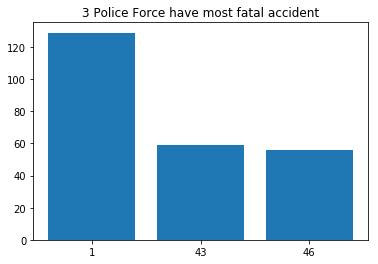

In [35]:
plt.title('3 Police Force have most fatal accident')
plt.bar(q1 ['Accident_Severity'].astype(str), q1['total'])
plt.show()

##Q2: find top 5 local Authorities that have most serious and fatal accident?

In [68]:
%%sh
impala-shell -q 'use RoadGB2; select local_authority_district, count(Accident_Severity) as Acseverity from accident where accident_Severity = '2' group by local_authority_district order by Acseverity desc limit 5;'

+--------------------------+------------+
| local_authority_district | acseverity |
+--------------------------+------------+
| 300                      | 375        |
| 204                      | 291        |
| 215                      | 279        |
| 1                        | 259        |
| 596                      | 224        |
+--------------------------+------------+


Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select local_authority_district, count(Accident_Severity) as Acseverity from accident where accident_Severity = 2 group by local_authority_district order by Acseverity desc limit 5
Fetched 5 row(s) in 0.66s


In [37]:
%%sh
impala-shell -q 'use RoadGB2; select local_authority_district, count(Accident_Severity) as Acseverity from accident where accident_Severity = '2' group by local_authority_district order by Acseverity desc limit 5;' -B -o local_authority_district --output_delimiter=','

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select local_authority_district, count(Accident_Severity) as Acseverity from accident where accident_Severity = 2 group by local_authority_district order by Acseverity desc limit 5
Fetched 5 row(s) in 0.62s


In [38]:
q2=pd.read_csv('local_authority_district', names=['local_authority_district','total'])

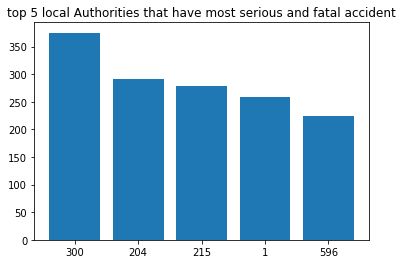

In [39]:
plt.title('top 5 local Authorities that have most serious and fatal accident')
plt.bar(q2 ['local_authority_district'].astype(str), q2['total'])
plt.show()

##Q3: find the vehicle type that have most serious and fatal accidents

In [69]:
%%sh
impala-shell -q 'use RoadGB2; select v.Vehicle_Type as vehicletype, count(*) As accident from vehicle v join accident a ON a.accident_index = v.accident_index where v.vehicle_Type IS NOT NULL AND v.vehicle_Type != -1 AND (a.accident_severity = 1 or a.accident_severity = 2) group by v.vehicle_type order by accident desc limit 1;'

+-------------+----------+
| vehicletype | accident |
+-------------+----------+
| 9           | 25596    |
+-------------+----------+


Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select v.Vehicle_Type as vehicletype, count(*) As accident from vehicle v join accident a ON a.accident_index = v.accident_index where v.vehicle_Type IS NOT NULL AND v.vehicle_Type != -1 AND (a.accident_severity = 1 or a.accident_severity = 2) group by v.vehicle_type order by accident desc limit 1
Fetched 1 row(s) in 1.02s


In [43]:
%%sh
impala-shell -q 'use RoadGB2; select v.Vehicle_Type as vehicletype, count(*) As accident from vehicle v join accident a ON a.accident_index = v.accident_index where v.vehicle_Type IS NOT NULL AND v.vehicle_Type != -1 AND (a.accident_severity = 1 or a.accident_severity = 2) group by v.vehicle_type order by accident desc limit 3;' -B -o vehicletype --output_delimiter=','

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select v.Vehicle_Type as vehicletype, count(*) As accident from vehicle v join accident a ON a.accident_index = v.accident_index where v.vehicle_Type IS NOT NULL AND v.vehicle_Type != -1 AND (a.accident_severity = 1 or a.accident_severity = 2) group by v.vehicle_type order by accident desc limit 3
Fetched 3 row(s) in 1.16s


In [44]:
q3=pd.read_csv('vehicletype', names=['Vehicle_Type','total'])

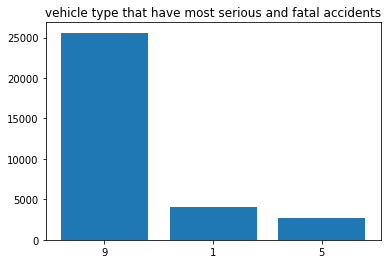

In [45]:
plt.title('vehicle type that have most serious and fatal accidents')
plt.bar(q3 ['Vehicle_Type'].astype(str), q3['total'])
plt.show()

## Q4: find age band of casualty that have most fatal accidents?

In [70]:
%%sh
impala-shell -q 'use RoadGB2; select c.age_band_of_casualty as ageBand, count(a.accident_severity) as fatalaccident from casualties c join accident a on a.accident_index = c.accident_index where c.age_band_of_casualty is not null and c.age_band_of_casualty != -1 and (a.accident_severity = 1) group by c.age_band_of_casualty order by "fatalaccident" desc limit 1;'

+---------+---------------+
| ageband | fatalaccident |
+---------+---------------+
| 5       | 313           |
+---------+---------------+


Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select c.age_band_of_casualty as ageBand, count(a.accident_severity) as fatalaccident from casualties c join accident a on a.accident_index = c.accident_index where c.age_band_of_casualty is not null and c.age_band_of_casualty != -1 and (a.accident_severity = 1) group by c.age_band_of_casualty order by "fatalaccident" desc limit 1
Fetched 1 row(s) in 5.26s


##Q5: group display the slight accident by day of week in west yorkshire police force area?

In [71]:
%%sh
impala-shell -q 'use RoadGB2; select count (ac.accident_index) as slightAccident, Day_Of_Week from accident ac where Police_Force = '13' and Accident_Severity = '3' group By Day_Of_week order By Day_of_Week;' 

+----------------+-------------+
| slightaccident | day_of_week |
+----------------+-------------+
| 379            | 1           |
| 501            | 2           |
| 521            | 3           |
| 535            | 4           |
| 530            | 5           |
| 621            | 6           |
| 502            | 7           |
+----------------+-------------+


Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select count (ac.accident_index) as slightAccident, Day_Of_Week from accident ac where Police_Force = 13 and Accident_Severity = 3 group By Day_Of_week order By Day_of_Week
Fetched 7 row(s) in 0.66s


In [50]:
%%sh
impala-shell -q 'use RoadGB2; select count (ac.accident_index) as slightAccident, Day_Of_Week from accident ac where Police_Force = '13' and Accident_Severity = '3' group By Day_Of_week order By Day_of_Week;' -B -o dayofweek --output_delimiter=','

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select count (ac.accident_index) as slightAccident, Day_Of_Week from accident ac where Police_Force = 13 and Accident_Severity = 3 group By Day_Of_week order By Day_of_Week
Fetched 7 row(s) in 0.63s


In [51]:
q5=pd.read_csv('dayofweek', names=['total','day_of_week'])

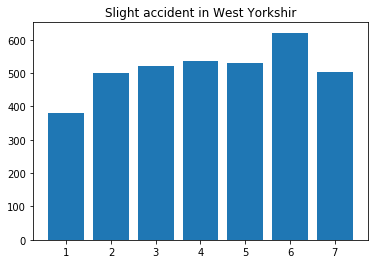

In [52]:
plt.title('Slight accident in West Yorkshir')
plt.bar(q5 ['day_of_week'].astype(str), q5['total'])
plt.show()

##Q6: find pick hour that have most fatal accidents in dual carriageway?

In [72]:
%%sh
impala-shell -q 'use RoadGB2; select hour(from_unixtime(unix_timestamp(concat(`date`,time),"dd/MM/yyyyHH:mm"))) as peakhour, count(*) as accidents from accident where Accident_Severity = '1' and Road_type = '3' group By peakhour order By accidents desc limit 5;'

+----------+-----------+
| peakhour | accidents |
+----------+-----------+
| 19       | 23        |
| 17       | 23        |
| 14       | 22        |
| 20       | 21        |
| 16       | 20        |
+----------+-----------+


Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select hour(from_unixtime(unix_timestamp(concat(`date`,time),"dd/MM/yyyyHH:mm"))) as peakhour, count(*) as accidents from accident where Accident_Severity = 1 and Road_type = 3 group By peakhour order By accidents desc limit 5
Fetched 5 row(s) in 0.95s


In [53]:
%%sh
impala-shell -q 'use RoadGB2; select hour(from_unixtime(unix_timestamp(concat(`date`,time),"dd/MM/yyyyHH:mm"))) as peakhour, count(*) as accidents from accident where Accident_Severity = '1' and Road_type = '3' group By peakhour order By accidents desc limit 5;' -B -o peakhour --output_delimiter=','

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select hour(from_unixtime(unix_timestamp(concat(`date`,time),"dd/MM/yyyyHH:mm"))) as peakhour, count(*) as accidents from accident where Accident_Severity = 1 and Road_type = 3 group By peakhour order By accidents desc limit 5
Fetched 5 row(s) in 1.06s


In [54]:
q6=pd.read_csv('peakhour', names=['hour','total'])

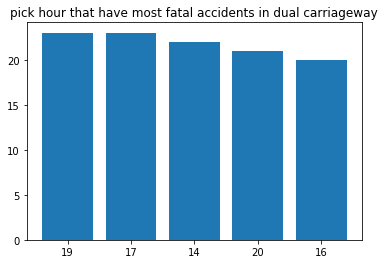

In [57]:
plt.title('pick hour that have most fatal accidents in dual carriageway')
plt.bar(q6 ['hour'].astype(str), q6['total'])
plt.show()

##Q7: find the area that have most fatal motorcycle accidents?

In [1]:
%%sh
impala-shell -q 'use RoadGB2; select a.local_authority_district as area, count(*) as accidents from accident a join vehicle v on v.accident_index = a.accident_index where a.accident_severity = '1' and v.vehicle_type IN(2,3,4,5,23,97) group by area order by accidents desc limit 5;'

+------+-----------+
| area | accidents |
+------+-----------+
| 356  | 8         |
| 476  | 7         |
| 130  | 7         |
| 381  | 7         |
| 596  | 6         |
+------+-----------+


Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select a.local_authority_district as area, count(*) as accidents from accident a join vehicle v on v.accident_index = a.accident_index where a.accident_severity = 1 and v.vehicle_type IN(2,3,4,5,23,97) group by area order by accidents desc limit 5
Fetched 5 row(s) in 1.31s


In [61]:
%%sh
impala-shell -q 'use RoadGB2; select a.local_authority_district as area, count(*) as accidents from accident a join vehicle v on v.accident_index = a.accident_index where a.accident_severity = '1' and v.vehicle_type IN(2,3,4,5,23,97) group by area order by accidents desc limit 5;' -B -o area --output_delimiter=','

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: use RoadGB2
Query: select a.local_authority_district as area, count(*) as accidents from accident a join vehicle v on v.accident_index = a.accident_index where a.accident_severity = 1 and v.vehicle_type IN(2,3,4,5,23,97) group by area order by accidents desc limit 5
Fetched 5 row(s) in 1.02s


In [65]:
q7=pd.read_csv('area', names=['local_authority_district','total'])

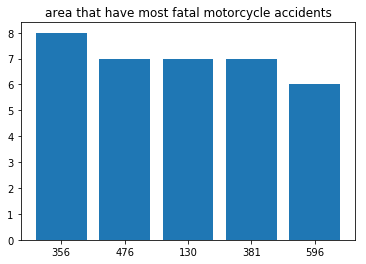

In [66]:
plt.title('area that have most fatal motorcycle accidents')
plt.bar(q7 ['local_authority_district'].astype(str), q7['total'])
plt.show()

##Data Pre-processing
Pre-processing data is a technique to discover data in data mining and big data (figure-1). Fast growing of data size in business, industrial, academic and science application. 
Generally pre-processing data is a powerful tool that can process complex data and it consumes time. Data pre-processing includes data cleaning, normalization, transformation, data integration, noise identification and missing values imputation. Then final data can be reliable and suitable source for analysis.
### Data Exploration
using and importing relevant libraries, but befor needs to install pip and upgrade, panda, matplot and seaborn. 

In [15]:
!sudo pip install pip --upgrade
!sudo pip install pandas
!sudo pip install matplotlib
!sudo pip install seaborn

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
/usr/local/lib/python2.7/site-packages/pip/_vendor/urllib3/util/ssl_.py:354: SNIMissingWarning: An HTTPS request has been made, but the SNI (Server Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/usr/local/lib/python2.7/site-packages/pip/_vendor/urllib3/util/ssl_.py:150: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of

##librarieis
###NumPy
stands for Numerical Python. The most powerful feature of NumPy is n-dimensional array. This library also contains basic linear algebra functions, Fourier transforms,  advanced random number capabilities and tools for integration with other low level languages like Fortran, C and C++.
###Matplotlib 
for plotting vast variety of graphs, starting from histograms to line plots to heat plots.. You can use Pylab feature in ipython notebook (ipython notebook –pylab = inline) to use these plotting features inline. If you ignore the inline option, then pylab converts ipython environment to an environment, very similar to Matlab. You can also use Latex commands to add math to your plot.
###Pandas 
for structured data operations and manipulations. It is extensively used for data munging and preparation. Pandas were added relatively recently to Python and have been instrumental in boosting Python’s usage in data scientist community.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the dataset in a dataframe using Pandas
take a look at the data, import accident table and see the 5 row at the top and at the end or tail.
Accidents includes 32 variables, detailing the location, time, date, lighting, weather, and road surface conditions, number of causalities, road type and other variables. 

In [68]:
filename = 'Acc.csv'

In [69]:
dataAcc = pd.read_csv('Acc.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
dataAcc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


In [71]:
dataAcc.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
129977,2017984121017,308024.0,602926.0,-3.450645,55.311793,98,3,1,1,17/12/2017,...,0,0,1,8,4,0,0,2,1,NaN
129978,2017984121217,331826.0,567154.0,-3.067116,54.994285,98,3,1,1,15/12/2017,...,0,0,1,1,1,0,6,1,2,NaN
129979,2017984121717,321809.0,573939.0,-3.225506,55.053767,98,3,2,1,18/12/2017,...,0,0,1,1,2,0,0,2,1,NaN
129980,2017984122317,310467.0,604501.0,-3.412672,55.326392,98,3,1,1,18/07/2017,...,0,0,1,1,1,0,0,2,1,NaN
129981,2017984122617,318705.0,566886.0,-3.272073,54.989905,98,2,2,2,20/12/2017,...,0,0,1,7,2,0,0,2,1,NaN


In [72]:
dataAcc.columns

Index([u'Accident_Index', u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location'],
      dtype='object')

In [73]:
dataAcc.to_numpy()

array([[2017010001708, 532920.0, 196330.0, ..., 1, 1, 'E01001450'],
       [2017010009342, 526790.0, 181970.0, ..., 1, 1, 'E01004702'],
       [2017010009344, 535200.0, 181260.0, ..., 1, 1, 'E01004298'],
       ...,
       ['2017984121717', 321809.0, 573939.0, ..., 2, 1, nan],
       ['2017984122317', 310467.0, 604501.0, ..., 2, 1, nan],
       ['2017984122617', 318705.0, 566886.0, ..., 2, 1, nan]],
      dtype=object)

#### Describe accident dataset and see the summary result.

In [74]:
dataAcc.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,129963.000000,1.299630e+05,129953.000000,129953.000000,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000,...,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000,129982.000000
mean,451170.256719,2.835784e+05,-1.268385,52.439387,28.527996,2.800849,1.838147,1.315513,4.105245,328.899286,...,301.154729,0.002739,0.823452,2.036597,1.641535,1.284093,0.072318,0.046714,1.327291,1.264744
std,95152.629739,1.534918e+05,1.395881,1.382508,25.064407,0.430441,0.722479,0.765469,1.930446,258.587181,...,1152.369545,0.248010,1.950560,1.724019,1.843830,0.645149,0.670572,0.563003,0.469390,0.441356
min,73639.000000,1.210700e+04,-7.409550,49.929558,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,387278.500000,1.760000e+05,-2.190772,51.470399,5.000000,3.000000,1.000000,1.000000,2.000000,91.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,457594.000000,2.241260e+05,-1.149752,51.900636,23.000000,3.000000,2.000000,1.000000,4.000000,303.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,528910.000000,3.888285e+05,-0.141685,53.393024,45.000000,3.000000,2.000000,1.000000,6.000000,513.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655391.000000,1.177531e+06,1.759641,60.480924,98.000000,3.000000,23.000000,42.000000,7.000000,941.000000,...,9704.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [75]:
dataAcc.groupby('Accident_Severity').sum()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
1,7.232359e+08,5.235922e+08,-2604.856566,8.832403e+04,58987,2963,2823,6770,673972,6328,...,329050,11,1133,4473,2537,2256,90,117,2736,1835
2,1.006459e+10,6.610485e+09,-30021.581426,1.183347e+06,680839,38805,31157,92202,7850514,95665,...,5827085,267,17835,48381,34600,29293,2081,1419,31203,26388
3,4.784761e+10,2.972062e+10,-132203.957836,5.542984e+06,2968300,197158,137013,434636,34226501,447071,...,32988559,78,88066,211867,176233,135360,7229,4536,138585,136171


using gruopby and pand for accident table.

In [77]:
accnew= dataAcc.groupby('Accident_Severity')[['Police_Force']].count()
accnew.head(3)

,Police_Force
Accident_Severity,
1,1676
2,22534
3,105772


In [78]:
accnew.sort_values('Police_Force').reset_index()
accnew.columns=['Top Numbers']
accnew

,Top Numbers
Accident_Severity,
1,1676
2,22534
3,105772


In [79]:
TopP = dataAcc.groupby('Police_Force')['Accident_Severity'].count().reset_index()
TopP.head(5)

,Police_Force,Accident_Severity
0,1,26747
1,3,1291
2,4,3355
3,5,2241
4,6,4069


In [80]:
top3 = dataAcc.groupby('Accident_Severity').Number_of_Casualties.agg(['sum', 'max', 'min', 'mean'])
top3

,sum,max,min,mean
Accident_Severity,,,,
1,2823,14,1,1.684368
2,31157,34,1,1.382666
3,137013,42,1,1.295362


save changes as dataframe with different type such as csv, exls

In [26]:
TopP.to_csv('modified1.csv', index = False)

Passing a lambda function will yield a <lambda> named row:

In [81]:
dataAcc.Police_Force.agg(['sum', lambda x: x.mean()])

sum         3.708126e+06
<lambda>    2.852800e+01
Name: Police_Force, dtype: float64

In [82]:
#read each row 

#for index, row in dataAcc.iterrows():
    #print (index, ['Police_Force'])
print(dataAcc.iloc[0:4])

  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2017010001708               532920.0                196330.0  -0.080107   
1  2017010009342               526790.0                181970.0  -0.173845   
2  2017010009344               535200.0                181260.0  -0.052969   
3  2017010009348               534340.0                193560.0  -0.060658   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.650061             1                  1                   2   
1  51.522425             1                  3                   2   
2  51.514096             1                  3                   3   
3  51.624832             1                  3                   2   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Control  \
0                     3  05/08/2017  ...                                  0   
1                     1  01/01/2017  ...                                  0   
2                     1  0

In [85]:
dataAcc['Police_Force'].plot(kind= 'hist', bins= 50, figsize= (12,6))

ImportError: matplotlib is required for plotting.

### check accident data type. 

In [86]:
dataAcc.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

### Check missing values in the dataset.
Check missing value
Missing values are not many but some variables have them so should be deal and estimated that. Sometimes missing value may not be NaNs, for example for the Road Safety data missing value is -1. So I checked missing values in three datasets. Also, it can fill that with 0, other values and replacement by mean. 

In [87]:
dataAcc.apply(lambda x: sum(x.isnull()),axis=0) 

Accident_Index                                    0
Location_Easting_OSGR                            19
Location_Northing_OSGR                           19
Longitude                                        29
Latitude                                         29
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              3
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [88]:
dataAcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 32 columns):
Accident_Index                                 129982 non-null object
Location_Easting_OSGR                          129963 non-null float64
Location_Northing_OSGR                         129963 non-null float64
Longitude                                      129953 non-null float64
Latitude                                       129953 non-null float64
Police_Force                                   129982 non-null int64
Accident_Severity                              129982 non-null int64
Number_of_Vehicles                             129982 non-null int64
Number_of_Casualties                           129982 non-null int64
Date                                           129982 non-null object
Day_of_Week                                    129982 non-null int64
Time                                           129979 non-null object
Local_Authority_(District)                     129

#### You can also use this method to check for null values

In [89]:
pd.isnull(dataAcc).any()

Accident_Index                                 False
Location_Easting_OSGR                           True
Location_Northing_OSGR                          True
Longitude                                       True
Latitude                                        True
Police_Force                                   False
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Date                                           False
Day_of_Week                                    False
Time                                            True
Local_Authority_(District)                     False
Local_Authority_(Highway)                      False
1st_Road_Class                                 False
1st_Road_Number                                False
Road_Type                                      False
Speed_limit                                    False
Junction_Detail                               

### To drop any rows that have missing data.

In [90]:
dataAcc.dropna(how ='any')
dataAcc.fillna(0)
dataAcc['Police_Force'].value_counts()

1     26747
20     5682
46     4788
13     4370
43     4129
44     4072
6      4069
47     3912
50     3568
45     3502
4      3355
42     3235
97     3185
14     2794
52     2774
31     2492
10     2362
16     2328
41     2242
5      2241
7      2210
22     2121
35     2004
32     1908
12     1856
21     1807
36     1767
62     1731
95     1692
40     1659
30     1643
33     1623
55     1596
37     1573
23     1368
54     1320
3      1291
63     1190
34     1068
11     1048
60     1004
53      799
17      679
61      629
92      467
93      459
96      406
91      352
94      316
48      313
98      236
Name: Police_Force, dtype: int64

### To put mean value if there is any rows that have missing data.

In [93]:
dataAcc['Police_Force'].fillna(dataAcc['Police_Force'].mean(), inplace=True)

#### Import casualty table and make datafarme in panda.
look at the head and tail of the dataset and have summry of dataset.
Casualties table includes 16 columns and it links via ‘Accident Index’ to the Accidents table, and each row representing a single person injured in a collision.

In [94]:
filename = 'Cas.csv'

In [95]:
datacas = pd.read_csv('Cas.csv')

In [96]:
datacas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2017010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,2017010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,2017010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


In [99]:
datacas.tail()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1
170992,2017984122617,2,2,1,1,50,8,2,0,0,0,0,0,9,2,-1


In [98]:
datacas.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000,170993.000000
mean,1.482166,1.397285,1.499155,1.406642,36.503921,6.298246,2.833812,0.755733,0.598750,0.250782,0.079307,0.091629,7.270099,0.796869,3.227957
std,0.656579,1.125848,0.726935,0.492172,19.283721,2.377378,0.399427,2.119174,1.926425,0.576786,0.534449,0.419243,8.275476,1.100744,3.595264
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,33.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,3.000000
75%,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,6.000000
max,101.000000,201.000000,3.000000,2.000000,100.000000,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


check the data type for casualty dataset.

In [100]:
datacas.dtypes

Accident_Index                        object
Vehicle_Reference                      int64
Casualty_Reference                     int64
Casualty_Class                         int64
Sex_of_Casualty                        int64
Age_of_Casualty                        int64
Age_Band_of_Casualty                   int64
Casualty_Severity                      int64
Pedestrian_Location                    int64
Pedestrian_Movement                    int64
Car_Passenger                          int64
Bus_or_Coach_Passenger                 int64
Pedestrian_Road_Maintenance_Worker     int64
Casualty_Type                          int64
Casualty_Home_Area_Type                int64
Casualty_IMD_Decile                    int64
dtype: object

### check the missing value or null value in casualty table.

In [101]:
datacas.apply(lambda x: sum(x.isnull()),axis=0) 

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [102]:
pd.isnull(datacas).any()

Accident_Index                        False
Vehicle_Reference                     False
Casualty_Reference                    False
Casualty_Class                        False
Sex_of_Casualty                       False
Age_of_Casualty                       False
Age_Band_of_Casualty                  False
Casualty_Severity                     False
Pedestrian_Location                   False
Pedestrian_Movement                   False
Car_Passenger                         False
Bus_or_Coach_Passenger                False
Pedestrian_Road_Maintenance_Worker    False
Casualty_Type                         False
Casualty_Home_Area_Type               False
Casualty_IMD_Decile                   False
dtype: bool

#### For DataFrame objects which don’t have a meaningful index, you may wish to append them and ignore the fact that
they may have overlapping indexes. To do this, use the ignore_index argument:
Jacc_cas = pd.concat([dataAcc, datacas], ignore_index=True, sort=False)
Here is an example of each of these methods. First, the default join='outer' behavior:

In [103]:
Jacc_cas = pd.concat([dataAcc, datacas], axis=1, sort=False)

In [104]:
Jacc_cas.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1.0,1.0,2.0,3.0,05/08/2017,...,4,3,0,0,1,0,0,9,1,2
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1.0,3.0,2.0,1.0,01/01/2017,...,4,2,0,0,0,0,0,2,-1,-1
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1.0,3.0,3.0,1.0,01/01/2017,...,4,1,0,0,0,0,0,2,-1,-1
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1.0,3.0,2.0,1.0,01/01/2017,...,6,3,0,0,1,0,0,9,1,5
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1.0,2.0,1.0,1.0,01/01/2017,...,6,3,0,0,0,0,0,9,1,5


#### Making data frame for vehicle table.
Vehicles tables includes 23 columns and gives details of the vehicles involved in collisions, and it links via ‘Accident Index’ to the Accidents table.

In [105]:
filename = 'Veh.csv'

In [106]:
dataveh = pd.read_csv('Veh.csv')

In [107]:
dataveh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [109]:
dataveh.tail()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
238921,2017984121717,1,19,0,11,0,1,0,0,0,...,1,2,38,7,-1,-1,-1,-1,-1,-1
238922,2017984121717,2,21,1,18,0,1,0,0,0,...,1,1,63,9,12777,2,-1,5,2,5
238923,2017984122317,1,4,0,17,0,0,1,0,0,...,6,1,25,5,498,1,16,-1,1,-1
238924,2017984122617,1,9,0,9,0,5,0,0,0,...,6,1,49,8,1997,2,-1,-1,3,-1
238925,2017984122617,2,9,0,18,0,8,0,0,0,...,1,1,50,8,1998,2,12,-1,2,-1


In [108]:
dataveh.describe()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.00000,238926.000000,...,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000,238926.000000
mean,1.562015,9.906184,0.014745,12.425035,0.168027,2.255108,0.197726,0.312285,0.31126,0.411010,...,4.661192,1.438567,35.584549,5.978600,1453.520278,0.997811,5.759243,2.930292,0.638696,2.930292
std,0.782231,10.602439,0.357576,6.403464,1.163374,3.021220,0.828050,1.650940,1.31636,1.879433,...,1.999122,0.642116,20.306062,3.031604,1623.333175,1.395609,6.026728,3.694274,1.180518,3.694274
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,9.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,2.000000,1.000000,23.000000,5.000000,125.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,6.000000,1.000000,35.000000,6.000000,1398.000000,1.000000,5.000000,2.000000,1.000000,2.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,4.000000,0.000000,0.000000,0.00000,0.000000,...,6.000000,2.000000,50.000000,8.000000,1956.000000,2.000000,10.000000,6.000000,1.000000,6.000000
max,101.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.00000,11.000000,...,6.000000,3.000000,100.000000,11.000000,16400.000000,12.000000,85.000000,10.000000,3.000000,10.000000


In [110]:
dataveh.dtypes

Accident_Index                      object
Vehicle_Reference                    int64
Vehicle_Type                         int64
Towing_and_Articulation              int64
Vehicle_Manoeuvre                    int64
Vehicle_Location-Restricted_Lane     int64
Junction_Location                    int64
Skidding_and_Overturning             int64
Hit_Object_in_Carriageway            int64
Vehicle_Leaving_Carriageway          int64
Hit_Object_off_Carriageway           int64
1st_Point_of_Impact                  int64
Was_Vehicle_Left_Hand_Drive?         int64
Journey_Purpose_of_Driver            int64
Sex_of_Driver                        int64
Age_of_Driver                        int64
Age_Band_of_Driver                   int64
Engine_Capacity_(CC)                 int64
Propulsion_Code                      int64
Age_of_Vehicle                       int64
Driver_IMD_Decile                    int64
Driver_Home_Area_Type                int64
Vehicle_IMD_Decile                   int64
dtype: obje

In [111]:
dataveh.apply(lambda x: sum(x.isnull()),axis=0) 

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [112]:
pd.isnull(dataveh).any()

Accident_Index                      False
Vehicle_Reference                   False
Vehicle_Type                        False
Towing_and_Articulation             False
Vehicle_Manoeuvre                   False
Vehicle_Location-Restricted_Lane    False
Junction_Location                   False
Skidding_and_Overturning            False
Hit_Object_in_Carriageway           False
Vehicle_Leaving_Carriageway         False
Hit_Object_off_Carriageway          False
1st_Point_of_Impact                 False
Was_Vehicle_Left_Hand_Drive?        False
Journey_Purpose_of_Driver           False
Sex_of_Driver                       False
Age_of_Driver                       False
Age_Band_of_Driver                  False
Engine_Capacity_(CC)                False
Propulsion_Code                     False
Age_of_Vehicle                      False
Driver_IMD_Decile                   False
Driver_Home_Area_Type               False
Vehicle_IMD_Decile                  False
dtype: bool

### Here is an example of each of these methods. First, the default join='outer' behavior:

In [115]:
Jacc_veh = pd.concat([dataAcc, dataveh], axis=1, sort=False)

In [116]:
Jacc_veh.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1.0,1.0,2.0,3.0,05/08/2017,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1.0,3.0,2.0,1.0,01/01/2017,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1.0,3.0,3.0,1.0,01/01/2017,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1.0,3.0,2.0,1.0,01/01/2017,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1.0,2.0,1.0,1.0,01/01/2017,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [117]:
q1= dataAcc[dataAcc.Accident_Severity == '1'].groupby(['Police_Force']).filter(lambda g: len(g) > 1000).groupby('Police_Force').size().sort_values(ascending=False)

/usr/local/lib/python2.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [118]:
q1.head(3)

Series([], dtype: int64)